In [125]:
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt

import time
from scipy.stats import linregress

In [126]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
movies_df = pd.read_csv("data/movie_inflation_merged.csv").dropna()

# Display sample data
movies_df.head()

,Unnamed: 0.1,IMDB_ID,original_title,year,date_published,genre 1 kaggle,genre 2 kaggle,genre 3 kaggle,duration,country,...,Revenue,Release Date,Runtime,Original Title,ID.1,Popularity,Vote Average,Budget,Genre List,Vote Count
2,2,tt0120679,Frida,2002,17/01/2003,Biography,Drama,Romance,123,"Mexico, USA, Canada",...,56298474,8/29/02,123,Frida,1360,19.246,7.432,12000000,"[['Drama', 'Romance']]",1844
27,27,tt0132245,Driven,2001,27/04/2001,Action,Drama,Sport,116,"USA, Canada, Australia",...,54744738,4/27/01,116,Driven,10477,15.559,5.162,94000000,"[['Action', 'Drama']]",611
34,34,tt0139654,Training Day,2001,16/11/2001,Crime,Drama,Thriller,122,USA,...,104876233,10/5/01,122,Training Day,2034,52.228,7.471,45000000,"[['Action', 'Crime', 'Drama']]",5086
36,36,tt0144084,American Psycho,2000,25/05/2001,Comedy,Crime,Drama,101,"USA, Canada",...,34266564,4/13/00,102,American Psycho,1359,61.425,7.392,7000000,"[['Thriller', 'Drama', 'Crime']]",9128
38,38,tt0144964,Highlander: Endgame,2000,1/9/00,Action,Adventure,Fantasy,87,"UK, USA, Luxembourg",...,15843608,9/1/00,87,Highlander: Endgame,12211,18.714,4.840,25000000,"[['Action', 'Fantasy']]",338


## Average rating of all movies for each year

Text(0, 0.5, 'Average Vote')

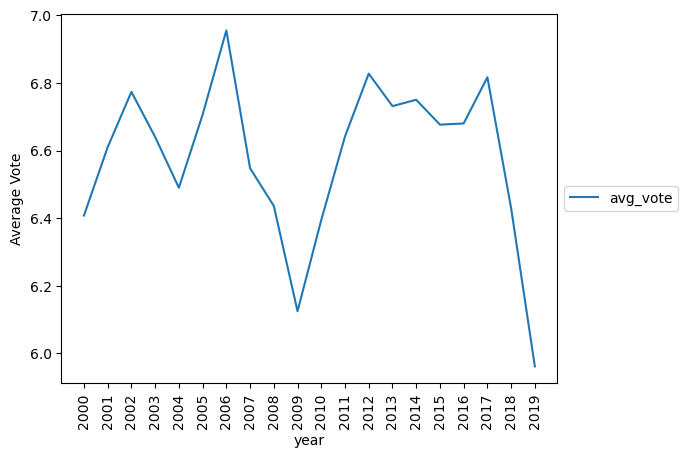

In [127]:
#groupby year to get the average of desired column

avg_vote = movies_df.groupby("year")["avg_vote"].mean()

#turn function into a DataFrame

avg_vote_df = pd.DataFrame(avg_vote)

#plot using matplotlib

lines = avg_vote_df.plot.line()
lines.set_xticks(avg_vote_df.index);
lines.set_xticklabels(avg_vote_df.index, rotation=90)
lines.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
lines.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
lines.set_ylabel('Average Vote')

## Average profit of each movie by year

Text(0, 0.5, 'Inflation Adjusted Avg Profit')

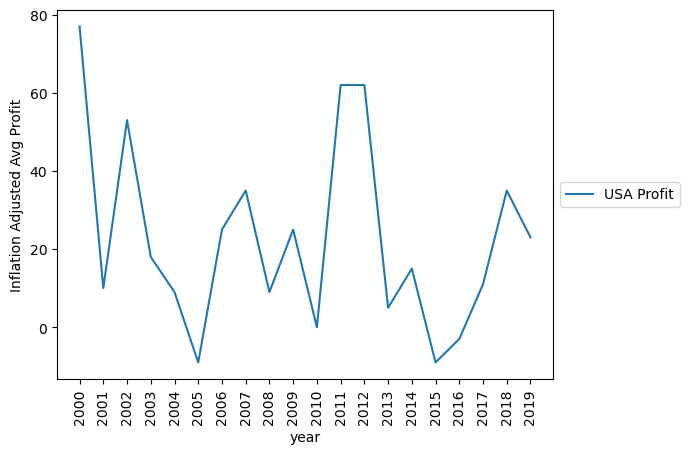

In [128]:
#groupby year to get the average of desired column

#USA Gross Income - Inflation Adjusted 
#Budget - Inflation Adjusted

movies_df["USA Gross Income - Inflation Adjusted"] = movies_df[" USA Gross Income - Inflation Adjusted "].str.extract('(\d+)', expand=False).astype('int64')
movies_df["Budget - Inflation Adjusted"] = movies_df["Budget - Inflation Adjusted"].str.extract('(\d+)', expand=False).astype('int64')
movies_df["USA Profit"] = movies_df["USA Gross Income - Inflation Adjusted"] - movies_df["Budget - Inflation Adjusted"]

avg_profit = movies_df.groupby("year")["USA Profit"].mean()

#turn function into a DataFrame

avg_profit_df = pd.DataFrame(avg_profit)

avg_profit_df = avg_profit_df["USA Profit"].astype('int64')

#plot using matplotlib

lines = avg_profit_df.plot.line()
lines.set_xticks(avg_profit_df.index);
lines.set_xticklabels(avg_profit_df.index, rotation=90)
lines.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
lines.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
lines.set_ylabel('Inflation Adjusted Avg Profit')

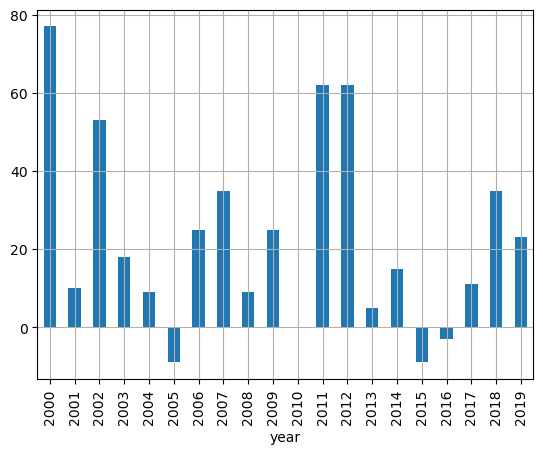

In [129]:
avg_profit_df.plot(kind="bar", x="year", y="USA Profit", grid=True)

plt.show()

## Average Budget of all movies in year

Text(0, 0.5, 'Inflation Adjusted Budget')

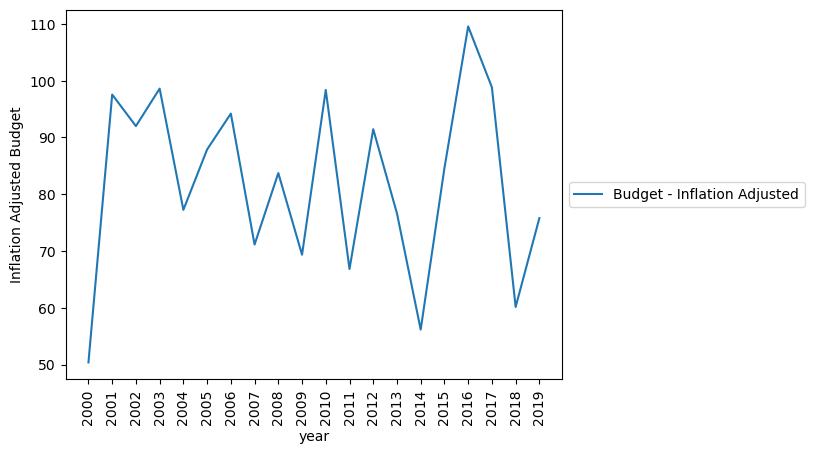

In [130]:
#groupby year to get the average of desired column

avg_budget = movies_df.groupby("year")["Budget - Inflation Adjusted"].mean()

#turn function into a DataFrame

avg_budget_df = pd.DataFrame(avg_budget)

#plot using matplotlib

lines = avg_budget_df.plot.line()
lines.set_xticks(avg_budget.index);
lines.set_xticklabels(avg_budget.index, rotation=90)
lines.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
lines.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
lines.set_ylabel('Inflation Adjusted Budget')

## Total Profit

Text(0, 0.5, 'Inflation Adjusted Total Profit')

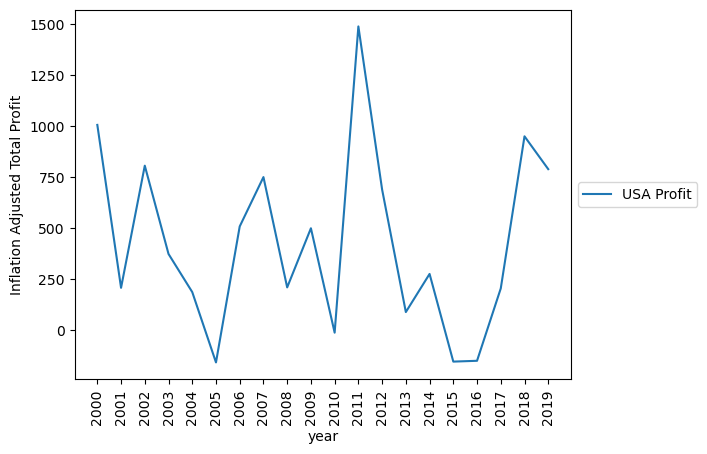

In [131]:
Total_profit = movies_df.groupby("year")["USA Profit"].sum()

#turn function into a DataFrame

Total_profit_df = pd.DataFrame(Total_profit)

#plot using matplotlib

lines = Total_profit_df.plot.line()
lines.set_xticks(Total_profit_df.index);
lines.set_xticklabels(Total_profit_df.index, rotation=90)
lines.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
lines.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
lines.set_ylabel('Inflation Adjusted Total Profit')

## Total Budget

Text(0, 0.5, 'Inflation Adjusted Total Budget')

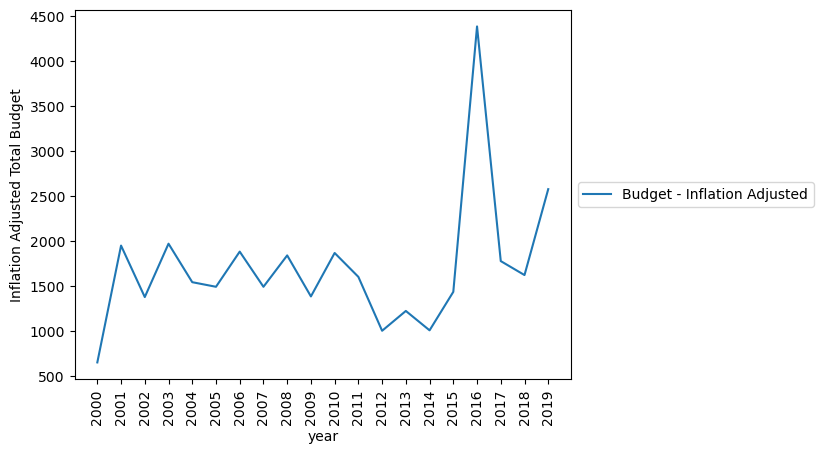

In [132]:
total_budget = movies_df.groupby("year")["Budget - Inflation Adjusted"].sum()

#turn function into a DataFrame

total_budget_df = pd.DataFrame(total_budget)

#plot using matplotlib

lines = total_budget_df.plot.line()
lines.set_xticks(total_budget_df.index);
lines.set_xticklabels(total_budget_df.index, rotation=90)
lines.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
lines.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
lines.set_ylabel('Inflation Adjusted Total Budget')

R squared: 0.0982160363718218


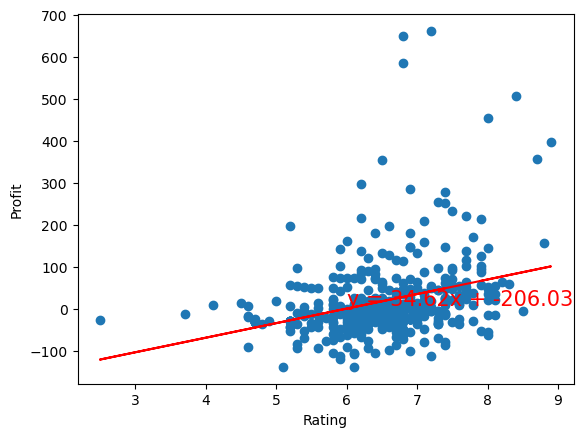

In [133]:
 ## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = movies_df["avg_vote"].astype("float")
y_values = movies_df["USA Profit"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Rating')
plt.ylabel('Profit')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.000576527673442443


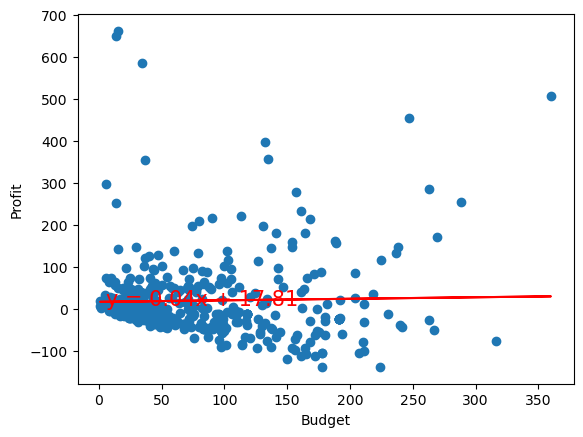

In [134]:
 ## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = movies_df["Budget - Inflation Adjusted"].astype("float")
y_values = movies_df["USA Profit"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Budget')
plt.ylabel('Profit')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()